In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


About Dataset

The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast 
of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attributes and 1 output attribute (class)
The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

Weather data observations

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

3. RH : Relative Humidity in %: 21 to 90

4. Ws : Wind speed in km/h: 6 to 29

5. Rain: total day in mm: 0 to 16.8

FWI Components

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

8. Drought Code (DC) index from the FWI system: 7 to 220.4

9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

10. Buildup Index (BUI) index from the FWI system: 1.1 to 68

11. Fire Weather Index (FWI) Index: 0 to 31.1

12. Classes: two classes, namely Fire and not Fire

In [2]:
# reading the file
dataset = pd.read_csv("Algerian_forest_fires_dataset.csv")
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [4]:
dataset.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [5]:
dataset.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

Data Cleaning

In [6]:
# missing values
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on Region from 122th indexx, we can make new column

1: "Bejaia Region Dataset"

2: "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [7]:
dataset.loc[:122, "Region"] = 0 # Bejaia Region
dataset.loc[122:, "Region"] = 1 # Sidi-Bel Abbes Region Dataset
df = dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [10]:
# region column in float type i.e. converting it to int 
df[['Region']] = df[['Region']].astype(int)

In [11]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [12]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       247 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.1+ KB


In [14]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [15]:
df['day'].isnull().sum()

1

In [16]:
df['day'].fillna(0)

0       1
1       2
2       3
3       4
4       5
       ..
242    26
243    27
244    28
245    29
246    30
Name: day, Length: 247, dtype: object

In [17]:
df['day'].isnull().sum()

1

In [18]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [19]:
# remove the 122nd row
df = df.drop(122).reset_index(drop=True)

In [20]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [21]:
df = df.drop(122).reset_index(drop=True)
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [22]:
df = df.drop(122).reset_index(drop=True)
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [23]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [24]:
# fix the spaces in clumn names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.8+ KB


Changing the required columns as integer data type

In [26]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [27]:
df[['day','month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day','month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    int32 
 1   month        244 non-null    int32 
 2   year         244 non-null    int32 
 3   Temperature  244 non-null    int32 
 4   RH           244 non-null    int32 
 5   Ws           244 non-null    int32 
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.1+ KB


In [29]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


Changing the required columns as floating data type

In [30]:
df.columns 

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [31]:
objects = [features for features in df.columns if df[features].dtypes=="O"]
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [32]:
columns_to_process = ['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI','Classes']

for column in columns_to_process:
    df[column] = df[column].astype(str).str.replace(" ","")

print(df)

     day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI   BUI  \
0      1      6  2012           29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1      2      6  2012           29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2      3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4      5      6  2012           27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...  ...   ...  ...   ...   
239   26      9  2012           30  65  14     0  85.4   16  44.5  4.5  16.9   
240   27      9  2012           28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241   28      9  2012           27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242   29      9  2012           24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243   30      9  2012           24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI  Classes  Region  
0    0.5  n

In [33]:
columns_to_convert = ['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.1+ KB


In [35]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [36]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.035391,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [37]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire,0


In [60]:
df['FWI'].isna().sum()

1

In [62]:
df['FWI'].unique()

array([ 0.5,  0.4,  0.1,  0. ,  2.5,  7.2,  7.1,  0.3,  0.9,  5.6,  0.2,
        1.4,  2.2,  2.3,  3.8,  7.5,  8.4, 10.6, 15. , 13.9,  3.9, 12.9,
        1.7,  4.9,  6.8,  3.2,  8. ,  0.6,  3.4,  0.8,  3.6,  6. , 10.9,
        4. ,  8.8,  2.8,  2.1,  1.3,  7.3, 15.3, 11.3, 11.9, 10.7, 15.7,
        6.1,  2.6,  9.9, 11.6, 12.1,  4.2, 10.2,  6.3, 14.6, 16.1, 17.2,
       16.8, 18.4, 20.4, 22.3, 20.9, 20.3, 13.7, 13.2, 19.9, 30.2,  5.9,
        7.7,  9.7,  8.3,  0.7,  4.1,  1. ,  3.1,  1.9, 10. , 16.7,  1.2,
        5.3,  6.7,  9.5, 12. ,  6.4,  5.2,  3. ,  9.6,  4.7,  nan, 14.1,
        9.1, 13. , 17.3, 30. , 25.4, 16.3,  9. , 14.5, 13.5, 19.5, 12.6,
       12.7, 21.6, 18.8, 10.5,  5.5, 14.8, 24. , 26.3, 12.2, 18.1, 24.5,
       26.9, 31.1, 30.3, 26.1, 16. , 19.4,  2.7,  3.7, 10.3,  5.7,  9.8,
       19.3, 17.5, 15.4, 15.2,  6.5])

In [64]:
mid = df['FWI'].median()
mid

4.2

In [73]:
df['FWI'].fillna(mid, inplace=True)

In [74]:
df['FWI'].unique()

array([ 0.5,  0.4,  0.1,  0. ,  2.5,  7.2,  7.1,  0.3,  0.9,  5.6,  0.2,
        1.4,  2.2,  2.3,  3.8,  7.5,  8.4, 10.6, 15. , 13.9,  3.9, 12.9,
        1.7,  4.9,  6.8,  3.2,  8. ,  0.6,  3.4,  0.8,  3.6,  6. , 10.9,
        4. ,  8.8,  2.8,  2.1,  1.3,  7.3, 15.3, 11.3, 11.9, 10.7, 15.7,
        6.1,  2.6,  9.9, 11.6, 12.1,  4.2, 10.2,  6.3, 14.6, 16.1, 17.2,
       16.8, 18.4, 20.4, 22.3, 20.9, 20.3, 13.7, 13.2, 19.9, 30.2,  5.9,
        7.7,  9.7,  8.3,  0.7,  4.1,  1. ,  3.1,  1.9, 10. , 16.7,  1.2,
        5.3,  6.7,  9.5, 12. ,  6.4,  5.2,  3. ,  9.6,  4.7, 14.1,  9.1,
       13. , 17.3, 30. , 25.4, 16.3,  9. , 14.5, 13.5, 19.5, 12.6, 12.7,
       21.6, 18.8, 10.5,  5.5, 14.8, 24. , 26.3, 12.2, 18.1, 24.5, 26.9,
       31.1, 30.3, 26.1, 16. , 19.4,  2.7,  3.7, 10.3,  5.7,  9.8, 19.3,
       17.5, 15.4, 15.2,  6.5])

In [75]:
df['FWI'].isna().sum()

0

In [76]:
# lets save the cleaned dataset
df.to_csv("Algerian_forest_fire_cleaned_dataset.csv", index=False)

Exploratory Data Analysis

In [39]:
#drop day, month and year
df_copy = df.drop(['day','month','year'], axis=1)

In [40]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire,0


In [41]:
# categories in classes
df_copy['Classes'].value_counts()

Classes
fire       137
notfire    106
nan          1
Name: count, dtype: int64

In [42]:
df_copy['Classes'].fillna('fire')

0      notfire
1      notfire
2      notfire
3      notfire
4      notfire
        ...   
239       fire
240    notfire
241    notfire
242    notfire
243    notfire
Name: Classes, Length: 244, dtype: object

In [43]:
df_copy['Classes'].isnull().sum()

0

In [44]:
# Encoding of the categories in classes
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('notfire'),0,1)

In [45]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [46]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
243,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [47]:
df_copy['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

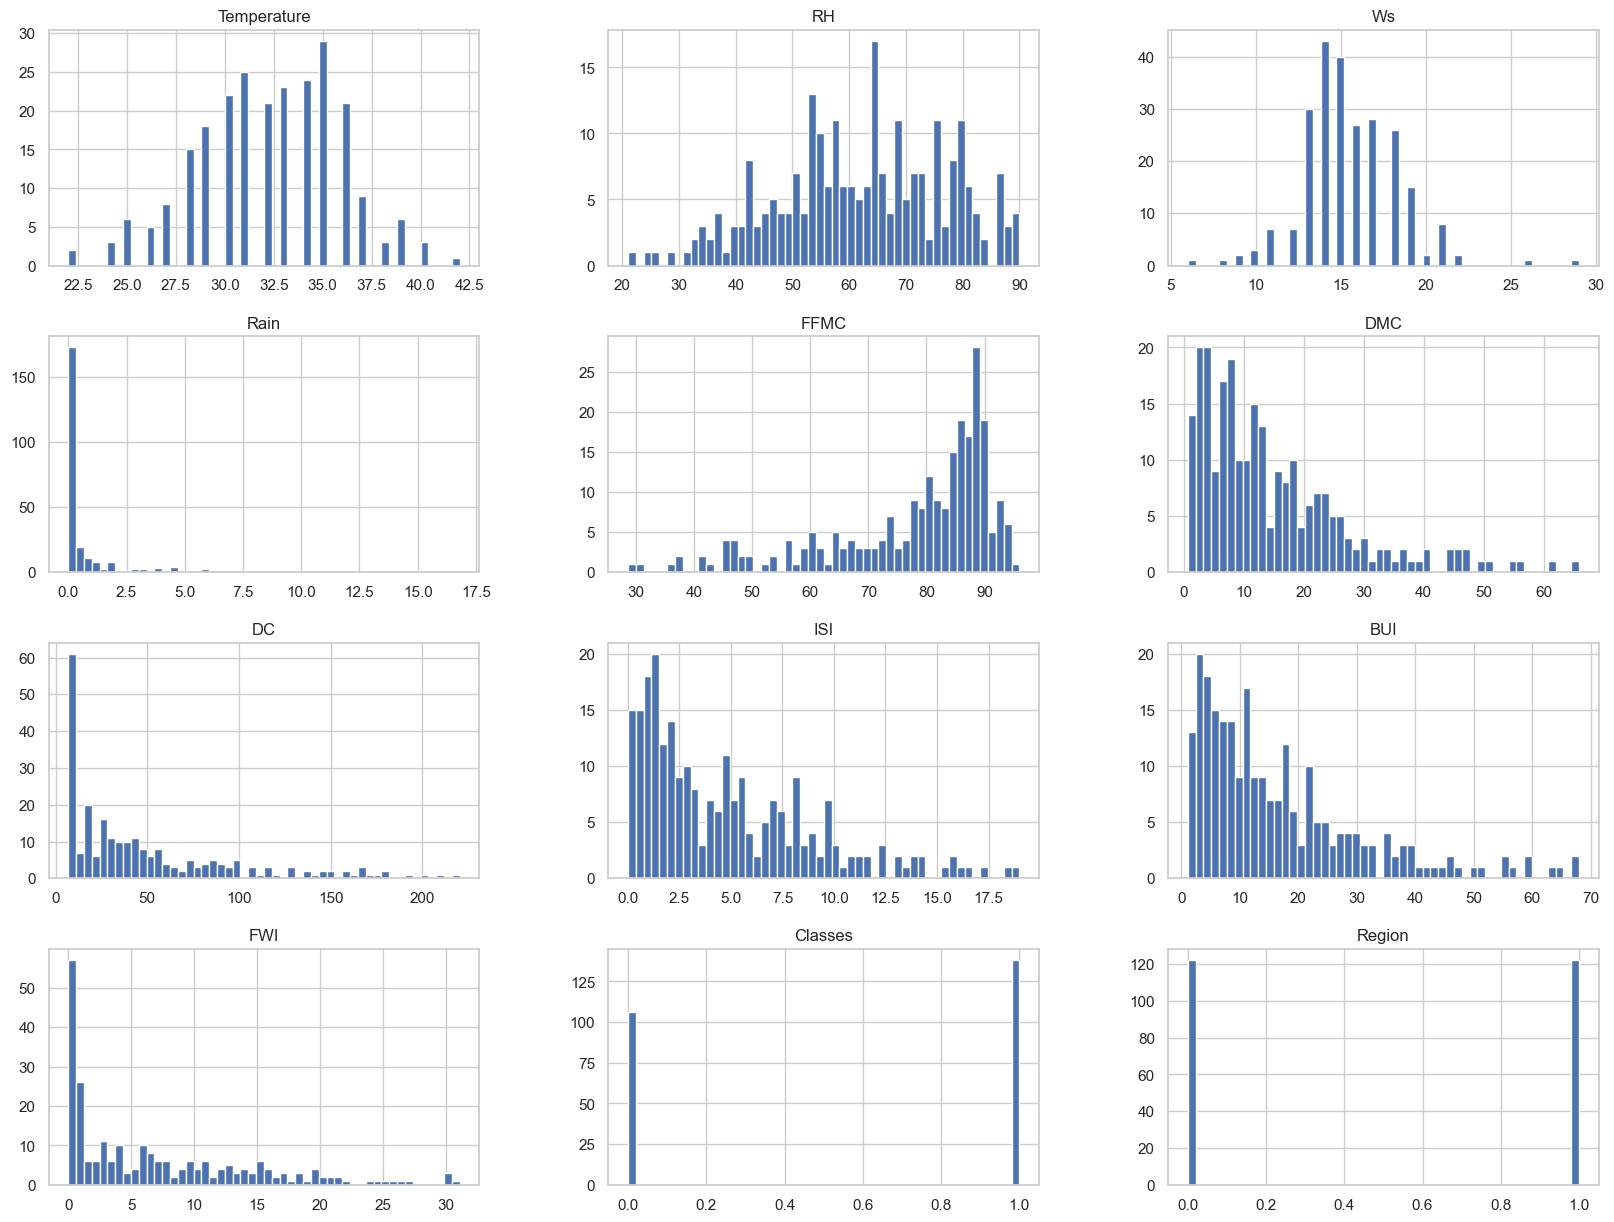

In [48]:
#Plot density plot for all features
#plt.style.use('seaborn')
sns.set(style="whitegrid")

df_copy.hist(bins=50, figsize=(20,15))
plt.show()

In [49]:
# percentage for pie chart
percentage = df_copy['Classes'].value_counts(normalize=True)*100

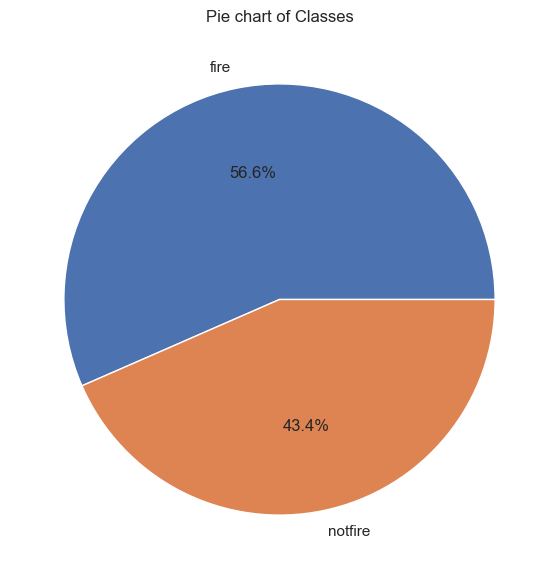

In [50]:
# plotting piechart
classlabels = ['fire','notfire']
plt.figure(figsize=(12,7))
plt.pie(percentage, labels=classlabels, autopct = "%1.1f%%")
plt.title("Pie chart of Classes")
plt.show()

almost 56.6% cases of fire and 43.4% of notfire

Correlation

In [51]:
df_copy.dtypes

Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int32
Region           int32
dtype: object

In [52]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.566670,0.518119,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.580957,-0.435023,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.032368,-0.066529,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.324422,-0.379449,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.691132,0.770114,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875864,0.584188,0.191094
DC,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.739521,0.507132,-0.081482
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.922895,0.735511,0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941906,0.635891,1.000000,0.857973,0.583882,0.087370
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

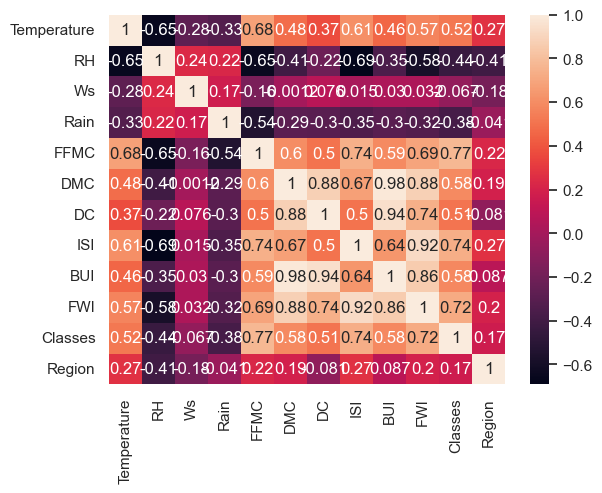

In [53]:
sns.heatmap(df_copy.corr(), annot=True)

<Axes: ylabel='FWI'>

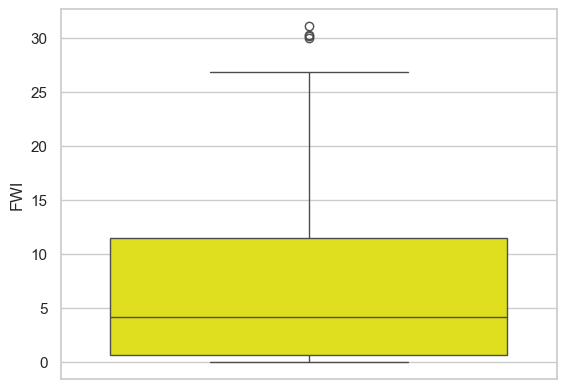

In [54]:
# box plots
sns.boxplot(df_copy['FWI'], color='yellow')

In [55]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire,0


In [56]:
df['Classes'] = np.where(df['Classes'].str.contains('notfire'),'not fire', 'fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Regions')

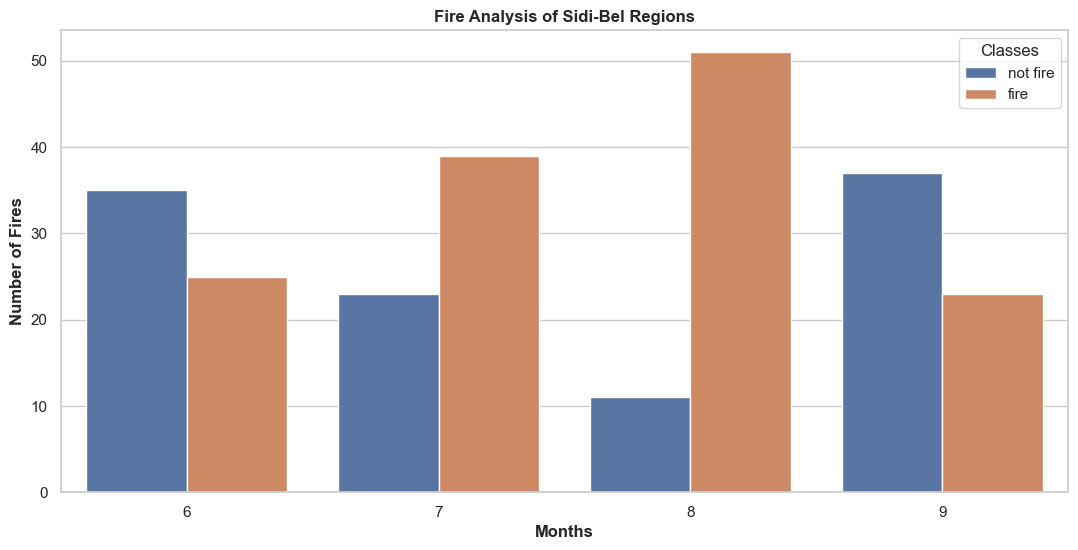

In [57]:
# Monthly fire analysis
dftemp = df[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes', data =df)
plt.xlabel('Months',weight='bold')
plt.ylabel('Number of Fires', weight='bold')
plt.title("Fire Analysis of Sidi-Bel Regions", weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Bejaia Region ')

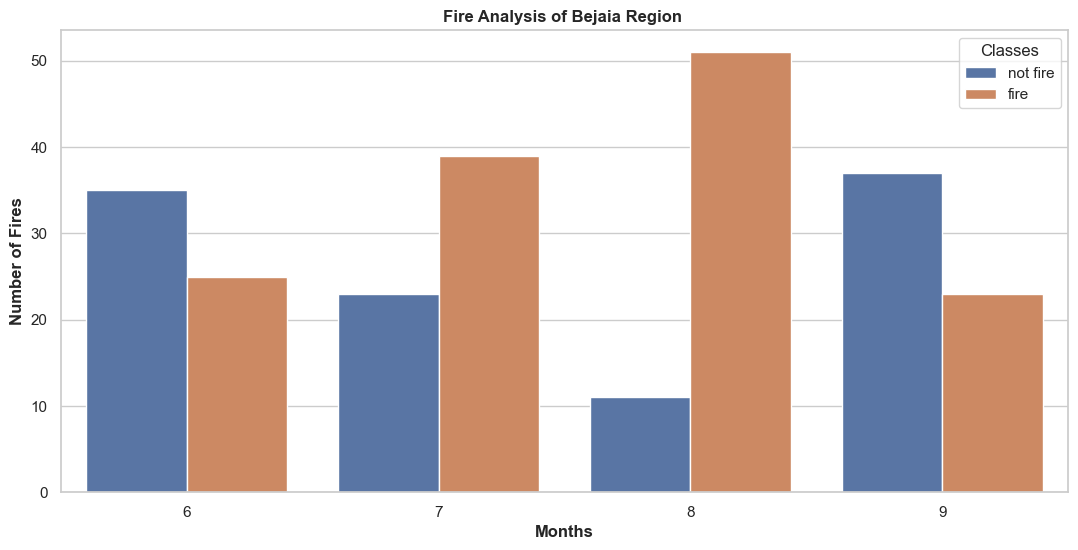

In [58]:
# Monthly fire analysis
dftemp = df[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes', data =df)
plt.xlabel('Months',weight='bold')
plt.ylabel('Number of Fires', weight='bold')
plt.title("Fire Analysis of Bejaia Region ", weight='bold')

In [59]:
# lets save the cleaned dataset
#df_copy.to_csv("Algerian_forest_fire_cleaned_dataset.csv", index=False)